In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [ ]:
# !pip install ipympl

# %matplotlib ipympl 
# while in vs code

In [2]:
%matplotlib notebook 
#while in jupyter notebook

In [6]:
plt.rcParams['figure.figsize'] = 8,8

In [7]:
class config:
    def __init__(self, space: np.array, n: int):
        self.space = space.copy()
        self.n = n
        
    def block(self):
        self.space[1:3, 1:3] = 1
        return self.space
    
    def beehive(self):
        self.space[1,2:4] = 1
        self.space[2,1] = self.space[2,4] = 1
        self.space[3,2:4] = 1
        return self.space
    
    def Blinker(self):
        self.space[2,1:4] = 1
        return self.space
    
    def Toad(self):
        self.space[2,2:5] = self.space[3,1:4] = 1
        return self.space
    
    def Pulsar(self):
        self.space[[1,6,8,13], 3:6] = self.space[[1,6,8,13], 9:12] = 1
        self.space[3:6, [1,6,8,13]] = self.space[9:12, [1,6,8,13]] = 1
        return self.space

    def Random(self):
        self.space = np.random.randint(low=0, high=2, size=(self.n,self.n))
        return self.space

<IPython.core.display.Javascript object>


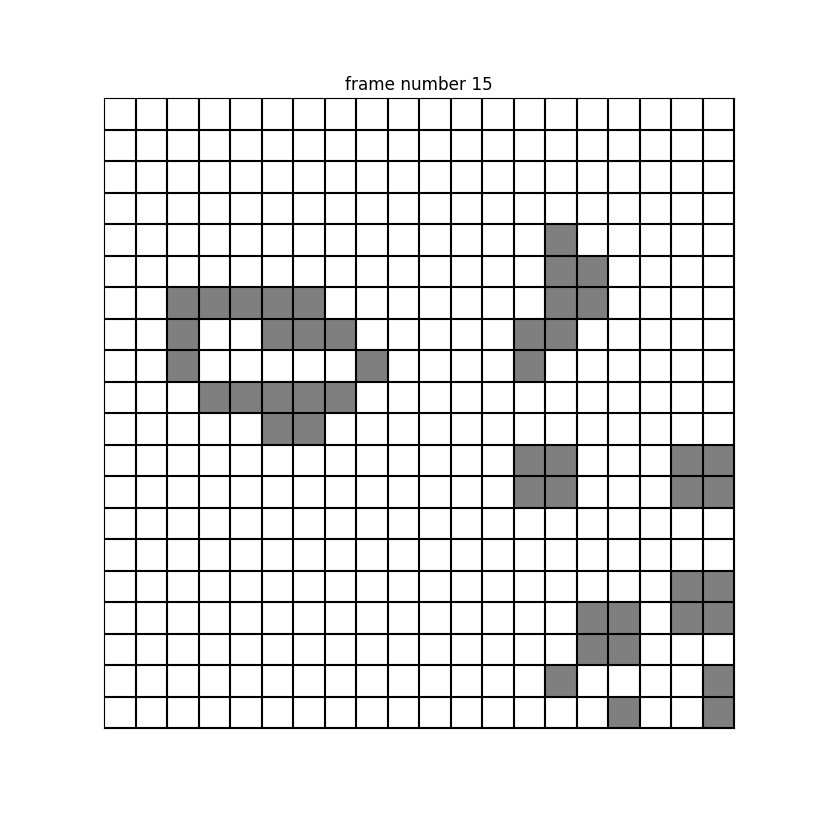

In [9]:
res = 20
space = np.zeros((res, res))

cfg = config(space, n=res)
space = cfg.Random()

coord = np.arange(res) + 0.5

def animate1(i):
    sim_rules1(i)
    plt.cla()
    plt.imshow(space, cmap='binary', vmin=0, vmax=2)
    for c in coord:
        plt.axvline(x=c, color='black')
        plt.axhline(y=c, color='black')
    plt.xticks(ticks=[], label=[])
    plt.yticks(ticks=[], label=[])
    plt.title(f'frame number {i+1}')
    
def sim_rules1(i):
    if i==0:
        pass
    else:
        global space
        new = space.copy()
        for i in range(res):
            for j in range(res):
                s = 0
                iprev = max(0, i-1); inext = min(res, i+2)
                jprev = max(0, j-1); jnext = min(res, j+2)
                s = space[iprev:inext, jprev:jnext].sum() - space[i,j]
                if space[i,j]==1 and (s<2 or s>3):
                    new[i,j]=0
                elif space[i,j]==0 and s==3:
                    new[i,j]=1
                else:
                    new[i,j]=space[i,j]
        space=new.copy()

    
anim1 = FuncAnimation(plt.gcf(), animate1, frames=res, interval=1000)
anim1.event_source.stop()
plt.tight_layout()
plt.show()